In [1]:
"""
Basic hierarchical document clustering using
agglomerative strategy.

Author: Fabrício Galende M. de Carvalho, D.Sc.
"""



from  sklearn.feature_extraction.text import TfidfVectorizer

from pandas import DataFrame

documents = ["O tempo está chuvoso",
             "O dia está ensolarado sem nuvens",
             "A comida está muito saborosa",
             "Dia chuvoso na cidade",
             "Gostei da comida do restaurante, muito saborosa"]

# First step is to build vector representation:

tfidf_transformer = TfidfVectorizer(norm='l2', use_idf=True)
documents_repr = tfidf_transformer.fit_transform(documents)
documents_repr_df = DataFrame(data = documents_repr.toarray())
print(documents_repr.toarray())
print(documents_repr_df)


[[0.55681615 0.         0.         0.         0.         0.
  0.         0.4622077  0.         0.         0.         0.
  0.         0.         0.         0.69015927]
 [0.         0.         0.         0.         0.39847472 0.
  0.49389914 0.33077001 0.         0.         0.         0.49389914
  0.         0.         0.49389914 0.        ]
 [0.         0.         0.52064623 0.         0.         0.
  0.         0.43218341 0.         0.52064623 0.         0.
  0.         0.52064623 0.         0.        ]
 [0.44400208 0.55032913 0.         0.         0.44400208 0.
  0.         0.         0.         0.         0.55032913 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.33067681 0.40986539 0.         0.40986539
  0.         0.         0.40986539 0.33067681 0.         0.
  0.40986539 0.33067681 0.         0.        ]]
         0         1         2         3         4         5         6   \
0  0.556816  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

Linkage matrix
   doc/cluster 1  doc/cluster 2  distance  cluster size
0            2.0            4.0  0.983365           2.0
1            0.0            3.0  1.227006           2.0
2            1.0            6.0  1.313421           3.0
3            5.0            7.0  1.628920           5.0




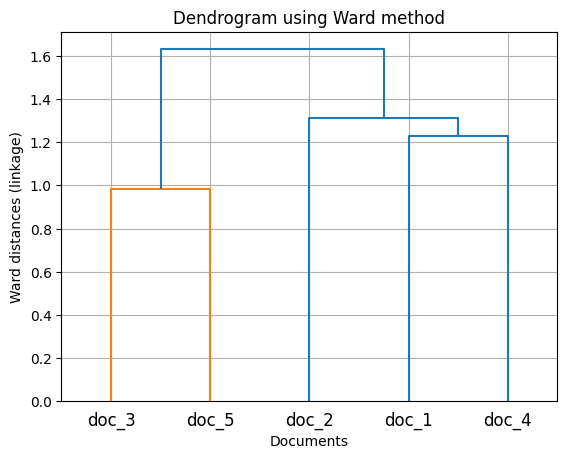

In [2]:
# Now we make the linkage. To do this, we need to establish linkage 
# using dense matrices.

from scipy.cluster.hierarchy import linkage

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

documents_repr_dense = documents_repr.toarray()

linkage_matrix = linkage(documents_repr_dense, method='ward')
linkage_matrix_df = DataFrame(data = linkage_matrix, columns=["doc/cluster 1", "doc/cluster 2", "distance", "cluster size"])
print("Linkage matrix")
print(linkage_matrix_df)
print("\n")
                              
dendrogram(linkage_matrix, labels=[f"doc_{i+1}" for i in range(len(documents))])

plt.title("Dendrogram using Ward method")
plt.xlabel("Documents")
plt.ylabel("Ward distances (linkage)")
plt.grid()
plt.show()

In [3]:
# Let's look at distance between some documents:
import numpy as np

distance_2_0 = np.linalg.norm(documents_repr_dense[2] - documents_repr_dense[0] )
distance_2_4 = np.linalg.norm(documents_repr_dense[2] - documents_repr_dense[4] )
distance_0_3 = np.linalg.norm(documents_repr_dense[0] - documents_repr_dense[3] )

print("Distance between docs 2 and 0 (not grouped in the first iteration): ", distance_2_0) 
print("Distance between docs 2 and 4 (grouped in first iteration): ", distance_2_4) 
print("Distance between docs 0 and 3 (grouped in the second iteration): ", distance_0_3) 



Distance between docs 2 and 0 (not grouped in the first iteration):  1.2651019722064019
Distance between docs 2 and 4 (grouped in first iteration):  0.9833647225192614
Distance between docs 0 and 3 (grouped in the second iteration):  1.2270064968508778


In [4]:
# Now let`s cut some clusters:
from scipy.cluster.hierarchy import fcluster

cluster_labels = fcluster(linkage_matrix, t=2, criterion='maxclust') #t is the maximum number of clusters when maxclust criterion is used
cluster_df = DataFrame({
    'document': documents,
    'cluster': cluster_labels
})
print(cluster_df.sort_values('cluster'))
print('\n')

"Lets filter documents that belong to class 1: "
documents_class_1 = cluster_df[cluster_df['cluster'] == 1]
print(documents_class_1)

                                          document  cluster
2                     A comida está muito saborosa        1
4  Gostei da comida do restaurante, muito saborosa        1
1                 O dia está ensolarado sem nuvens        2
0                             O tempo está chuvoso        2
3                            Dia chuvoso na cidade        2


                                          document  cluster
2                     A comida está muito saborosa        1
4  Gostei da comida do restaurante, muito saborosa        1


In [5]:
# Now let's cut based upon distance:
cluster_labels = fcluster(linkage_matrix, t=1.2, criterion='distance') #t is the maximum distance when distance criterion is used
cluster_df = DataFrame({
    'document': documents,
    'cluster': cluster_labels
})
print(cluster_df)


                                          document  cluster
0                             O tempo está chuvoso        2
1                 O dia está ensolarado sem nuvens        4
2                     A comida está muito saborosa        1
3                            Dia chuvoso na cidade        3
4  Gostei da comida do restaurante, muito saborosa        1
